### Linear Regression using Julia  

In this notebook, I presented Julia version of the solutions, Here I have used Linear Regression on Boston dataset, This notebook does not contain polynomial regression part, because It is still in progress. 

In [57]:
# import Pkg
# Pkg.add("Plots")
# Pkg.add("Lathe")
# Pkg.add("GLM")
# Pkg.add("StatsPlots")
# Pkg.add("MLBase")
# Pkg.add("Metrics")  

# Uncomment this if you haven't installed the above libraries 

In [ ]:
# packages we will use 
using Plots
using Lathe
using GLM
using Statistics
using StatsPlots
using MLBase  
using Metrics  
using DataFrames, CSV
using Polynomials

In [11]:
# loading the data  

df = CSV.read("data\\out.csv", DataFrame)
first(df,5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0
2,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0
3,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0
4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0
5,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0


In [13]:
# printing the size of the data 

println(size(df))

(506, 14)


In [14]:
# describing the data 

describe(df)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Int64,DataType
1,CRIM,3.61352,0.00632,0.25651,88.9762,0,Float64
2,ZN,11.3636,0.0,0.0,100.0,0,Float64
3,INDUS,11.1368,0.46,9.69,27.74,0,Float64
4,CHAS,0.06917,0.0,0.0,1.0,0,Float64
5,NOX,0.554695,0.385,0.538,0.871,0,Float64
6,RM,6.28463,3.561,6.2085,8.78,0,Float64
7,AGE,68.5749,2.9,77.5,100.0,0,Float64
8,DIS,3.79504,1.1296,3.20745,12.1265,0,Float64
9,RAD,9.54941,1.0,5.0,24.0,0,Float64


In [15]:
# printing the names of the dataframe 

names(df)

14-element Vector{String}:
 "CRIM"
 "ZN"
 "INDUS"
 "CHAS"
 "NOX"
 "RM"
 "AGE"
 "DIS"
 "RAD"
 "TAX"
 "PTRATIO"
 "B"
 "LSTAT"
 "SalePrice"

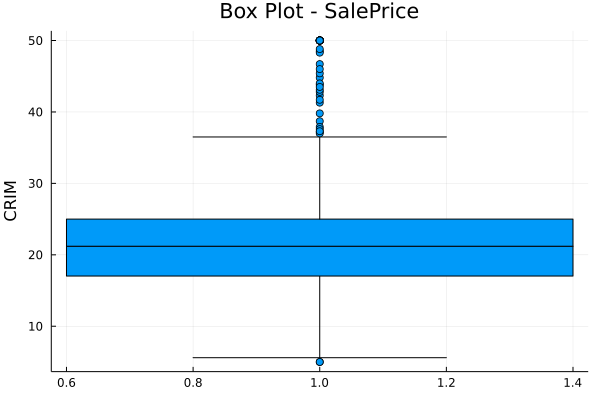

In [22]:
# boxplot for out target variable 

boxplot(df.SalePrice, title = "Box Plot - SalePrice", ylabel = "CRIM", legend = false)

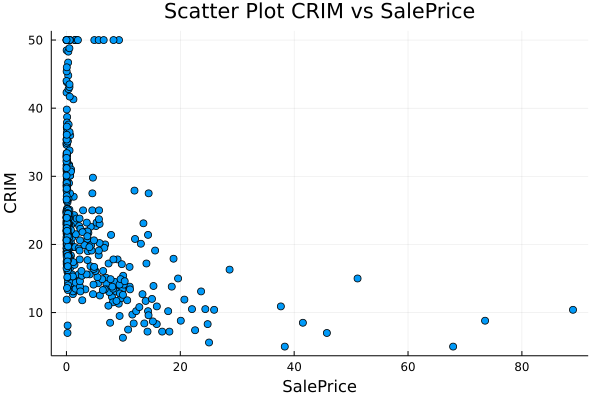

In [24]:
# correlation plot 

train_plot = scatter(df.CRIM,df.SalePrice, title = "Scatter Plot CRIM vs SalePrice", ylabel = "CRIM", xlabel = "SalePrice",legend = false)

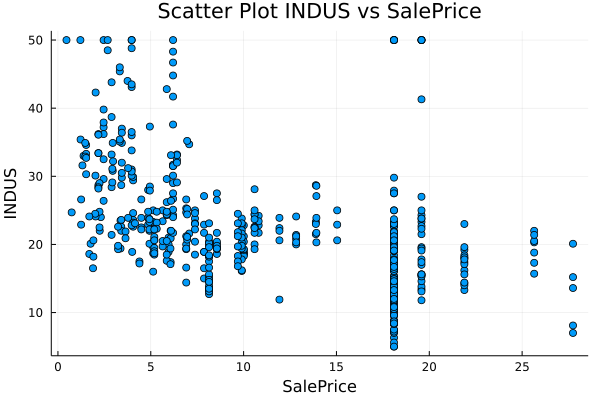

In [25]:
train_plot = scatter(df.INDUS,df.SalePrice, title = "Scatter Plot INDUS vs SalePrice", ylabel = "INDUS", xlabel = "SalePrice",legend = false)

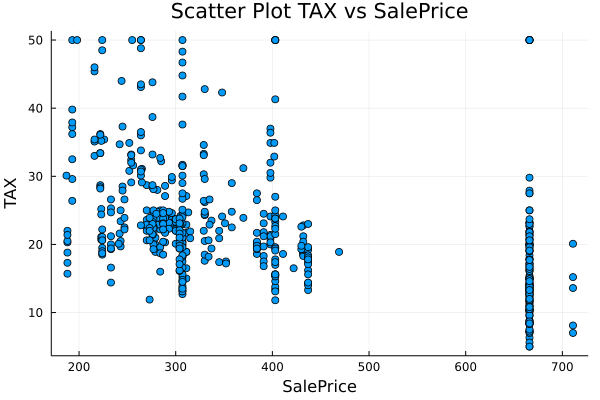

In [26]:
train_plot = scatter(df.TAX,df.SalePrice, title = "Scatter Plot TAX vs SalePrice", ylabel = "TAX", xlabel = "SalePrice",legend = false)

In [29]:
# Train test split for diving our data 

using Lathe.preprocess: TrainTestSplit
train, test = TrainTestSplit(df,.75) 
first(train, 5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0
5,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0


In [31]:
# taking a look at the size of training data 

println(size(train))

(388, 14)


In [32]:
# taking a look at the size of testing data 

println(size(test))

(118, 14)


In [37]:
# building linear regression model with all the features and one target variable 

fm = @formula(SalePrice ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT) 
linearregressor = lm(fm, train)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

SalePrice ~ 1 + CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT

Coefficients:
────────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error      t  Pr(>|t|)     Lower 95%    Upper 95%
────────────────────────────────────────────────────────────────────────────────
(Intercept)   32.2344     6.18734      5.21    <1e-06   20.068       44.4007
CRIM          -0.096813   0.0353805   -2.74    0.0065   -0.166383    -0.0272434
ZN             0.0559225  0.0155536    3.60    0.0004    0.0253389    0.086506
INDUS          0.037159   0.0711401    0.52    0.6017   -0.102726     0.177044
CHAS           2.63139    1.02384      2.57    0.0106    0.618184     4.6446
NOX          -12.7104     4.50354     -2.82    0.0050  -21.5658      -3.85

In [47]:
# making predictions 

y_predicted = predict(linearregressor, test) 

118-element Vector{Union{Missing, Float64}}:
 30.257569399329533
 25.102897520234006
 10.213362687396213
 18.30609647011218
 15.918702530891178
 18.285305920340207
 11.723530559085212
 17.367774990939857
 15.245581037686078
 19.327415627467538
  7.4161933158744695
 23.451131696858674
 22.92595266546901
  ⋮
 18.773461129422785
 22.759388697901052
 19.0436268251718
 20.536792254149326
 19.82291469224453
 25.6867877444079
 15.067772405729784
 19.393643735031073
 22.371533915466763
 19.451521650198
  2.897763250285564
 21.227743510092843

In [83]:
# Evaluating our model using MAE 

println("R2 Score", r2(linearregressor)) 
println("MAE ", Metrics.mae(y_predicted, test.SalePrice))  
MSE = Metrics.mse(y_predicted, test.SalePrice) 
println("RMSE:- ", sqrt(MSE)) 


# here our model is performing bad because linear regression does not works well on non-linear data and with some other assumptions which are:- 
# Linear relationship.
# Multivariate normality.
# No or little multicollinearity.
# No auto-correlation.
# Homoscedasticity


R2 Score0.7483442644093596
MAE 3.269229661186728
RMSE:- 4.548533879113553
